In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [121]:
data = pd.read_csv('/workspaces/Decision-tree-algorithm/data/processed/clean-data.csv')
data

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
719,10,101,76,32.9,0.171,63,0
720,2,122,70,36.8,0.340,27,0
721,5,121,72,26.2,0.245,30,0
722,1,126,60,30.1,0.349,47,1


In [122]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Árbol de Decisión Complejo

In [123]:
c_tree = DecisionTreeClassifier(random_state=42)
c_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [124]:
train_pred = simple_tree.predict(X_train)
test_pred = simple_tree.predict(X_test)

In [125]:
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

1.0

In [126]:
test_accuracy = accuracy_score(y_test, test_pred)
test_accuracy

0.7655172413793103

In [127]:
diff_accuracy = train_accuracy - test_accuracy
diff_accuracy

0.23448275862068968

 - La precisión en el conjunto de entrenamiento es del 100%, lo que indica que el modelo clasifica todas las instancias del conjunto de entrenamiento correctamente.
 - Sin embargo, la precisión en el conjunto de prueba es del 76.55%, lo que sugiere que el modelo puede estar sobreajustando los datos de entrenamiento y no generaliza tan bien con datos nuevos.
 
Es posible que el modelo esté demasiado ajustado a los datos de entrenamiento y no pueda generalizar bien a datos no vistos. Sería útil investigar más a fondo para determinar si se necesita ajustar la complejidad del modelo o si se pueden aplicar técnicas de regularización para mejorar su capacidad de generalización.

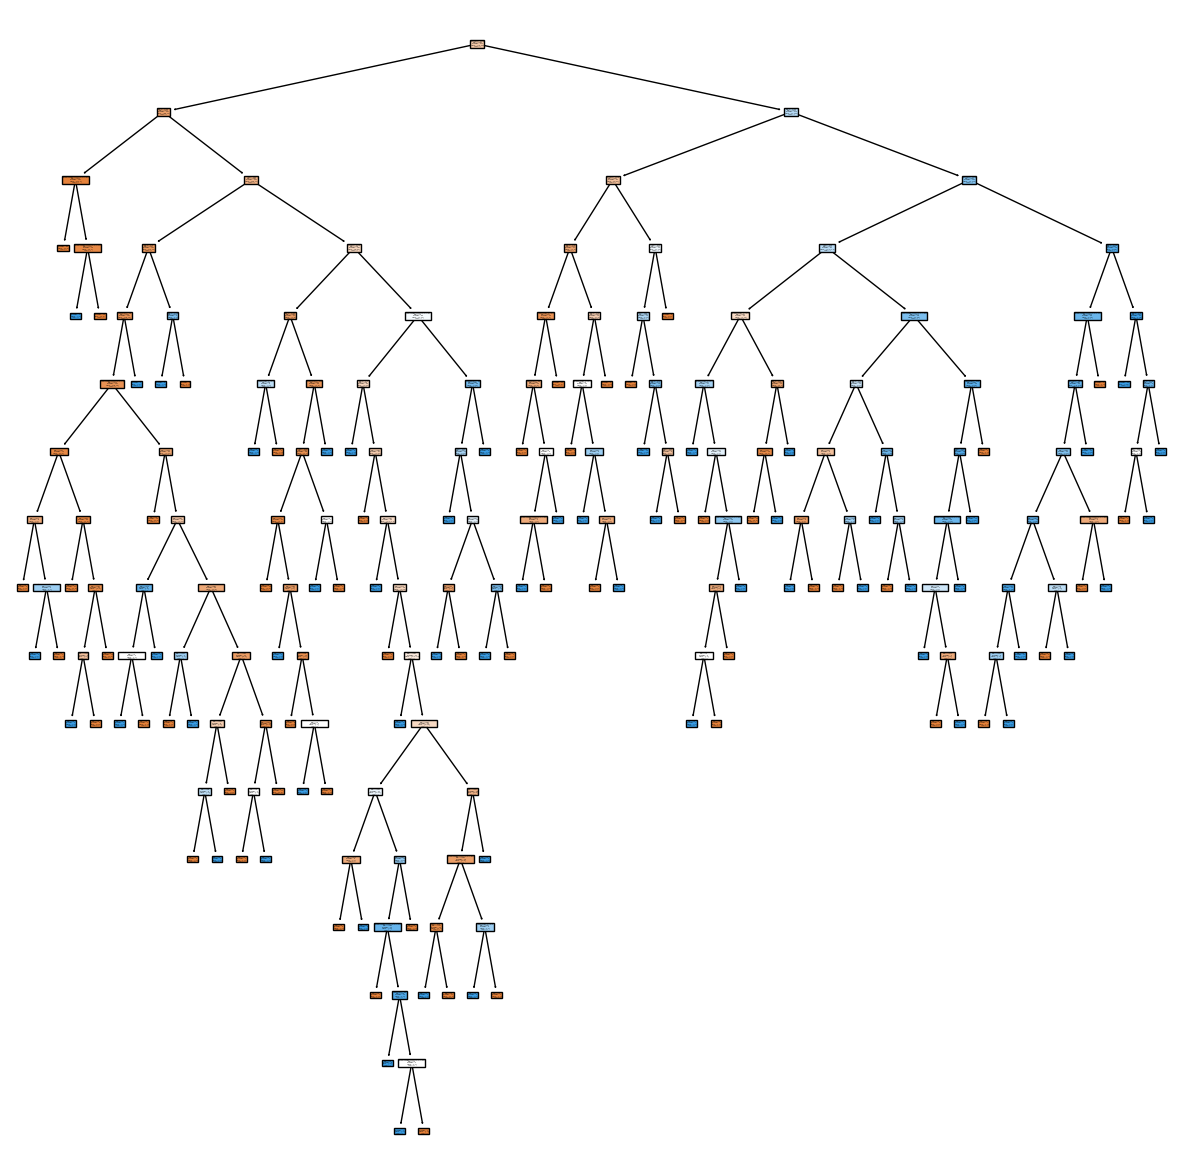

In [128]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(c_tree, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

Optimización / Regularización

* Las técnicas de regularización L1 y L2 no son aplicables directamente a los árboles de decisión, se regularizan ajustando sus hiperparámetros.

In [129]:
hyperparams = {
    "criterion": ["gini", "entropy"],                # Funciones de criterio para medir la calidad de una división
    "splitter": ["best", "random"],                  # La estrategia utilizada para elegir la división en cada nodo
    "max_depth": [2, 3],                          # La profundidad máxima del árbol
    "min_samples_split": [50, 60, 70, 80],   # Número mínimo de muestras requeridas para dividir un nodo interno
    "min_samples_leaf": [30, 35, 40, 45],    # Número mínimo de muestras requeridas para ser un nodo hoja           
}


grid = GridSearchCV(c_tree, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [30, 35, 40, 45],
                         'min_samples_split': [50, 60, 70, 80],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [130]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 30, 'min_samples_split': 50, 'splitter': 'best'}


In [131]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 2, min_samples_leaf = 30, min_samples_split = 50, splitter = 'best', random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=30,
                       min_samples_split=50, random_state=42)

In [132]:
train_pred = simple_tree.predict(X_train)
test_pred = simple_tree.predict(X_test)

In [133]:
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

1.0

In [134]:
test_accuracy = accuracy_score(y_test, test_pred)
test_accuracy

0.7655172413793103

In [135]:
diff_accuracy = train_accuracy - test_accuracy
diff_accuracy

0.23448275862068968